## Import Necessary Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [3]:
forest_fire=pd.read_csv('forestfires (1).csv')
forest_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## Data Understanding

In [4]:
forest_fire.shape

(517, 31)

In [5]:
forest_fire.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
forest_fire.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

### Inference:
* The dataset have 31 features and 517 records

* The datatype of the features are assigned correctly

* The dataset have no null values

## Data visualization

In [7]:
forest_fire['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

<AxesSubplot:xlabel='size_category', ylabel='count'>

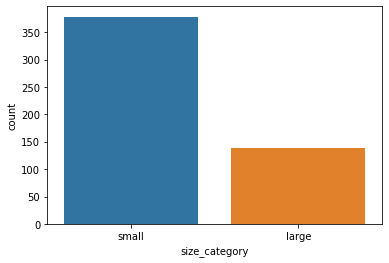

In [8]:
sns.countplot(forest_fire['size_category'])

<AxesSubplot:xlabel='FFMC', ylabel='Density'>

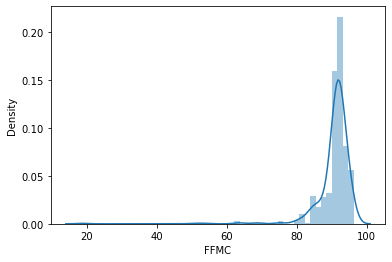

In [9]:
sns.distplot(forest_fire['FFMC'])

<AxesSubplot:xlabel='temp', ylabel='Density'>

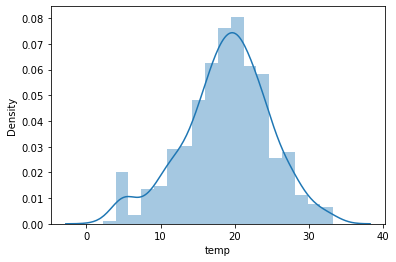

In [10]:
sns.distplot(forest_fire['temp'])

<AxesSubplot:xlabel='wind', ylabel='Density'>

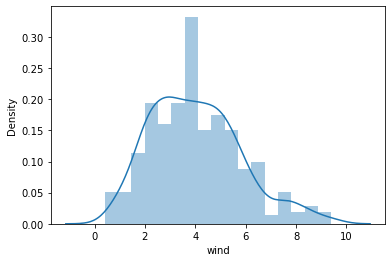

In [11]:
sns.distplot(forest_fire['wind'])

<AxesSubplot:xlabel='rain', ylabel='Density'>

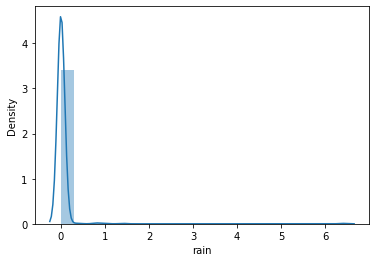

In [12]:
sns.distplot(forest_fire['rain'])

<AxesSubplot:xlabel='area', ylabel='Density'>

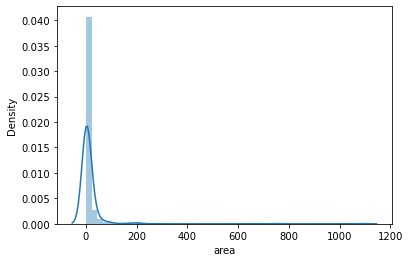

In [13]:
sns.distplot(forest_fire['area'])

<AxesSubplot:xlabel='RH', ylabel='Density'>

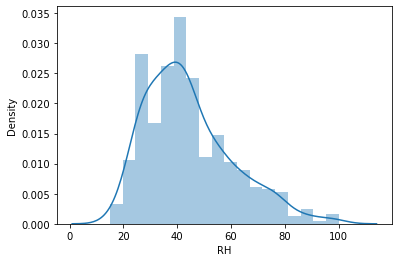

In [14]:
sns.distplot(forest_fire['RH'])

## Data preprocessing

In [15]:
forest_fire.drop(columns='month',axis=1,inplace=True)
forest_fire.drop(columns='day',axis=1,inplace=True)

In [16]:
x=forest_fire.iloc[:,:-1]
y=forest_fire['size_category']

In [17]:
from sklearn.preprocessing import StandardScaler
std_model=StandardScaler()

In [18]:
x_transform=std_model.fit_transform(x)
x_transform

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
y_transform=le.fit_transform(y)
y_transform

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

## Model building

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_transform,y_transform,test_size=0.2)

In [23]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((413, 28), (413,), (104, 28), (104,))

In [24]:
x_train

array([[ 0.1732292 ,  1.10069855,  0.26252257, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [ 0.13696295,  0.49273893,  0.21571556, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [ 0.75348916,  1.8149339 ,  0.64061017, ..., -0.04402255,
        -0.17285971, -0.70608125],
       ...,
       [ 0.08256358,  0.33488823,  1.06590827, ..., -0.04402255,
        -0.17285971,  1.41626761],
       [ 0.98921976,  1.0975728 ,  0.4973646 , ..., -0.04402255,
        -0.17285971, -0.70608125],
       [ 0.40895981,  0.4083435 ,  0.63939964, ..., -0.04402255,
        -0.17285971,  1.41626761]])

In [49]:
y_test

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

## Model training

In [27]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_dim = 28), #I/player
                                    tf.keras.layers.Dense(25,activation = 'relu'), #Hidden layer 1
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')]) #O/p layer

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 28)                0         
                                                                 
 dense (Dense)               (None, 25)                725       
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer ='RMSprop',loss= 'binary_crossentropy',metrics =['accuracy'])

In [30]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 1ms/step - loss: 0.7638 - accuracy: 0.5085
Epoch 2/10
13/13 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5763
Epoch 3/10
13/13 [==============================] - 0s 1ms/step - loss: 0.6516 - accuracy: 0.6223
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.6852
Epoch 5/10
13/13 [==============================] - 0s 1ms/step - loss: 0.5959 - accuracy: 0.7094
Epoch 6/10
13/13 [==============================] - 0s 1ms/step - loss: 0.5763 - accuracy: 0.7482
Epoch 7/10
13/13 [==============================] - 0s 1ms/step - loss: 0.5608 - accuracy: 0.7627
Epoch 8/10
13/13 [==============================] - 0s 1ms/step - loss: 0.5488 - accuracy: 0.7724
Epoch 9/10
13/13 [==============================] - 0s 1ms/step - loss: 0.5368 - accuracy: 0.7724
Epoch 10/10
13/13 [==============================] - 0s 917us/step - loss: 0.5270 - accuracy: 0.7748


In [31]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.7500


[0.5458664894104004, 0.75]

## Model testing

In [32]:
y_pred = model.predict(x_test)
y_pred

array([[0.5767344 ],
       [0.6768606 ],
       [0.5317    ],
       [0.79545844],
       [0.7462788 ],
       [0.73253906],
       [0.84371907],
       [0.7381943 ],
       [0.7835609 ],
       [0.7238369 ],
       [0.7626014 ],
       [0.64722335],
       [0.72730887],
       [0.8349921 ],
       [0.43016517],
       [0.6084816 ],
       [0.7167306 ],
       [0.59219444],
       [0.83937347],
       [0.7195434 ],
       [0.12971953],
       [0.6686381 ],
       [0.8014351 ],
       [0.7372189 ],
       [0.7161714 ],
       [0.61424226],
       [0.6724743 ],
       [0.7286715 ],
       [0.7712529 ],
       [0.5285559 ],
       [0.7332062 ],
       [0.66517806],
       [0.74418783],
       [0.74245226],
       [0.8341886 ],
       [0.78248954],
       [0.7817707 ],
       [0.694981  ],
       [0.6751758 ],
       [0.62935   ],
       [0.7778504 ],
       [0.64894414],
       [0.67683804],
       [0.6635469 ],
       [0.74144346],
       [0.7492406 ],
       [0.80652416],
       [0.547

In [54]:
pred=[]
for i in range(0,len(y_pred)):
    if y_pred[i]<0.5:
        y_pr=0
    else:
        y_pr=1
    pred.append(y_pr)

In [55]:
len(pred)

104

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [57]:
accuracy_score(y_test,pred)

0.75